# Example: Simulating a power grid model stored in the extended 3DCityDB

This example shows how to extract the information about a power grid stored in the 3DCityDB and create a simulation model for [pandapower](https://pandapower.readthedocs.io/en/v2.0.1/index.html) from it.

## Connecting to the database

Define connection parameters.

In [1]:
from dblayer import *

connect = PostgreSQLConnectionInfo(
    user = 'postgres',
    pwd = 'postgres',
    host = 'localhost',
    port = '5432',
    dbname = 'testdb'
    )

Create and instance of class `PandaPowerModelDBReader`.

In [2]:
from dblayer.sim.pandapower import *

pp_reader = PandaPowerModelDBReader( connect )

## Creating the simulation model

Retrieve the simulation model.

In [3]:
net = pp_reader.get_net( network_id = 1000 )

Inspect the simulation model. See [here](https://pandapower.readthedocs.io/en/v2.0.1/elements.html) for details about the individual elements.

In [4]:
net

This pandapower network includes the following parameter tables:
   - bus (44 elements)
   - load (15 elements)
   - switch (3 elements)
   - ext_grid (1 element)
   - line (37 elements)
   - trafo (3 elements)
   - line_geodata (37 elements)
   - bus_geodata (44 elements)

## Using the simulation model

Run a power flow calculation.

In [5]:
pp.runpp( net, numba=False )

Plot the results from the power flow calculation. See [here](https://pandapower.readthedocs.io/en/v2.0.1/plotting.html) for other plotting options.

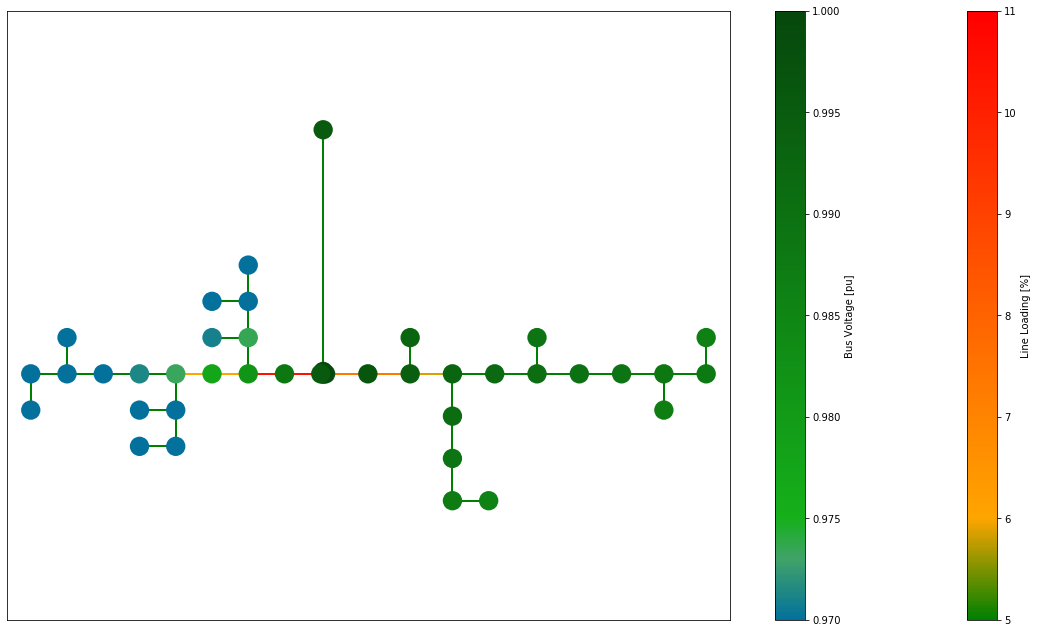

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandapower.plotting as pp_plot

cmap_list = [ ( 5, 'green' ), ( 6, 'orange' ), ( 11, 'red' ) ]
cmap, norm = pp_plot.cmap_continous( cmap_list )
lc = pp_plot.create_line_collection( net, net.line.index, zorder = 1, cmap = cmap, norm = norm, linewidths = 2 )
    
cmap_list = [ ( .970, 'xkcd:ocean blue' ), ( .973, 'xkcd:greenish' ), ( .975, 'xkcd:green' ), ( 1., 'xkcd:forest green' ) ]
cmap, norm = pp_plot.cmap_continous( cmap_list )
bc = pp_plot.create_bus_collection( net, net.bus.index, size = 8, zorder = 2, cmap = cmap, norm = norm )

pp_plot.draw_collections( [lc, bc], figsize = ( 16, 9 ) )
plt.show()

Store the pandapower model in JSON format.

In [7]:
import os
data_folder = 'json'

net.bus.to_json( os.path.join( data_folder, 'bus.json' ) )
net.bus_geodata.to_json( os.path.join( data_folder, 'bus_geodata.json' ) )
net.line.to_json( os.path.join( data_folder, 'line.json' ) )
net.trafo.to_json( os.path.join( data_folder, 'trafo.json' ) )
net.switch.to_json( os.path.join( data_folder, 'switch.json' ) )
net.ext_grid.to_json( os.path.join( data_folder, 'ext_grid.json' ) )
net.load.to_json( os.path.join( data_folder, 'load.json' ) )

Done.